In [1]:
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Data Tidying and Cleaning Lab
## Reading, tidying and cleaning data. Preparing data for exploration, mining, analysis and learning

In this lab, you'll be working with the Coffee Quality Index dataset, located [here](https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi). For convenience (and to save trouble in case you can't download files, or someone uploads a newer version), I've provided the dataset in the `data/` folder. The metadata (description) is at the Kaggle link. For this lab, you'll only need `merged_data_cleaned.csv`, as it is the concatenation of the other two datasets.

In this (and the following labs), you'll get several questions and problems. Do your analysis, describe it, use any tools and plots you wish, and answer. You can create any amount of cells you'd like.

Sometimes, the answers will not be unique, and they will depend on how you decide to approach and solve the problem. This is usual - we're doing science after all!

It's a good idea to save your clean dataset after all the work you've done to it.

### Problem 1. Read the dataset (1 point)
This should be self-explanatory. The first column is the index.

In [2]:
coffee_set = pd.read_csv('data/merged_data_cleaned.csv', encoding='unicode_escape')

In [3]:
coffee_set

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,...,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,...,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,...,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


### Problem 2. Observations and features (1 point)
How many observations are there? How many features? Which features are numerical, and which are categorical?

**Note:** Think about the _meaning_, not the data types. The dataset hasn't been thoroughly cleaned.

In [4]:
coffee_set.shape

(1339, 44)

In [5]:
coffee_set.dtypes

Unnamed: 0                 int64
Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags             int64
Bag.Weight                object
In.Country.Partner        object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points            float64
Total.Cup.

In [6]:
num_features = coffee_set.select_dtypes(include=['number']).columns.tolist()
num_features

['Unnamed: 0',
 'Number.of.Bags',
 'Aroma',
 'Flavor',
 'Aftertaste',
 'Acidity',
 'Body',
 'Balance',
 'Uniformity',
 'Clean.Cup',
 'Sweetness',
 'Cupper.Points',
 'Total.Cup.Points',
 'Moisture',
 'Category.One.Defects',
 'Quakers',
 'Category.Two.Defects',
 'altitude_low_meters',
 'altitude_high_meters',
 'altitude_mean_meters']

In [7]:
len(num_features)

20

In [8]:
category_features = coffee_set.select_dtypes(include=['object']).columns.tolist()
category_features

['Species',
 'Owner',
 'Country.of.Origin',
 'Farm.Name',
 'Lot.Number',
 'Mill',
 'ICO.Number',
 'Company',
 'Altitude',
 'Region',
 'Producer',
 'Bag.Weight',
 'In.Country.Partner',
 'Harvest.Year',
 'Grading.Date',
 'Owner.1',
 'Variety',
 'Processing.Method',
 'Color',
 'Expiration',
 'Certification.Body',
 'Certification.Address',
 'Certification.Contact',
 'unit_of_measurement']

In [9]:
len(category_features)

24

### Problem 3. Column manipulation (1 point)
Make the column names more Pythonic (which helps with the quality and... aesthetics). Convert column names to `snake_case`, i.e. `species`, `country_of_origin`, `ico_number`, etc. Try to not do it manually.

In [10]:
coffee_set.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

Now we will create a function ___columns_to_snake_case___  that convert column names to snake_case

In [11]:
def columns_to_snake_case(column_name):
    column_name = column_name.strip().replace(" ", "_").lower()
    column_name = column_name.strip().replace(".", "_").lower()
    column_name = column_name.strip().replace(":", "").lower()
    return column_name

Now we will use the function ___columns_to_snake_case___  to convert all column names to snake_case

In [12]:
converted_column_names = [columns_to_snake_case(col) for col in coffee_set.columns]
coffee_set.columns = converted_column_names
coffee_set.columns

Index(['unnamed_0', 'species', 'owner', 'country_of_origin', 'farm_name',
       'lot_number', 'mill', 'ico_number', 'company', 'altitude', 'region',
       'producer', 'number_of_bags', 'bag_weight', 'in_country_partner',
       'harvest_year', 'grading_date', 'owner_1', 'variety',
       'processing_method', 'aroma', 'flavor', 'aftertaste', 'acidity', 'body',
       'balance', 'uniformity', 'clean_cup', 'sweetness', 'cupper_points',
       'total_cup_points', 'moisture', 'category_one_defects', 'quakers',
       'color', 'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

 All column names was converted to snake_case

### Problem 4. Bag weight (1 point)
What's up with the bag weights? Make all necessary changes to the column values. Don't forget to document your methods and assumptions.

Now let's see what the weights are in the coffee bag

In [13]:
coffee_set["bag_weight"].unique()

array(['60 kg', '1', '30 kg', '69 kg', '1 kg', '2 kg,lbs', '6', '3 lbs',
       '50 kg', '2 lbs', '100 lbs', '15 kg', '2 kg', '2', '70 kg',
       '19200 kg', '5 lbs', '1 kg,lbs', '6 kg', '0 lbs', '46 kg', '40 kg',
       '20 kg', '34 kg', '1 lbs', '660 kg', '18975 kg', '12000 kg',
       '35 kg', '66 kg', '80 kg', '132 lbs', '5 kg', '25 kg', '59 kg',
       '18000 kg', '150 lbs', '9000 kg', '18 kg', '10 kg', '29 kg',
       '1218 kg', '4 lbs', '0 kg', '13800 kg', '1500 kg', '24 kg',
       '80 lbs', '8 kg', '3 kg', '350 kg', '67 kg', '4 kg', '55 lbs',
       '100 kg', '130 lbs'], dtype=object)

We see that there are different units of measurement that we need to reduce to a common unit of measurement.
Therefore, we will need to convert __pounds__ to __kilograms__.

In [14]:
def convert_to_kg(weight):
    return float(weight) * 0.453592

for idx, col in enumerate(coffee_set["bag_weight"]):
    full_weight = col.split()
    
    if len(full_weight) == 2:
        measure, name = full_weight
        if name.lower() != 'kg':
            convert_measure = convert_to_kg(measure)
            full_weight[0] = f"{convert_measure:.2f}"  
            full_weight[1] = 'kg'
            coffee_set.at[idx, 'bag_weight'] = " ".join(full_weight)

Let’s check if all measures are converted to kilograms.

In [15]:
coffee_set["bag_weight"].unique()
coffee_set

,unnamed_0,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,...,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,...,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,...,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


### Problem 5. Dates (1 point)
This should remind you of problem 4 but it's slightly nastier. Fix the harvest years, document the process.

While you're here, fix the expiration dates, and grading dates. Unlike the other column, these should be dates (`pd.to_datetime()` is your friend).

In [16]:
coffee_set.harvest_year

0       2014
1       2014
2        NaN
3       2014
4       2014
        ... 
1334    2016
1335    2016
1336    2014
1337    2013
1338    2013
Name: harvest_year, Length: 1339, dtype: object

In [17]:
def convert_harvest_year(harvest_year):
    if pd.isna(harvest_year):
        return np.nan
    harvest_year = harvest_year.strip()

    # Handle simple year or year range
    if '/' in harvest_year:
        # Split the range and take the first year
        year = harvest_year.split('/')[0]
    elif '-' in harvest_year:
        # Handle "December 2009-March 2010" format
        year = harvest_year[-4:]  # Take the last year mentioned
    else:
        # Handle simple years
        if harvest_year.isdigit():
            year = harvest_year
        else:
            return np.nan  # Invalid entries like 'mmm' or 'TEST'

    try:
        # Convert to datetime using the first day of the year
        return pd.to_datetime(year + '-01-01')
    except:
        return np.nan
        
coffee_set['harvest_year']=coffee_set['harvest_year'].apply(convert_harvest_year)
#coffee_set['harvest_year']=pd.to_datetime(coffee_set['harvest_year'],errors='coerce')

In [18]:
coffee_set['harvest_year']

0      2014-01-01
1      2014-01-01
2             NaT
3      2014-01-01
4      2014-01-01
          ...    
1334   2016-01-01
1335   2016-01-01
1336   2014-01-01
1337   2013-01-01
1338   2013-01-01
Name: harvest_year, Length: 1339, dtype: datetime64[ns]

In [19]:
coffee_set.expiration

0           April 3rd, 2016
1           April 3rd, 2016
2            May 31st, 2011
3          March 25th, 2016
4           April 3rd, 2016
               ...         
1334     January 18th, 2017
1335     January 18th, 2017
1336    December 23rd, 2015
1337      August 25th, 2015
1338      August 25th, 2015
Name: expiration, Length: 1339, dtype: object

In [20]:
coffee_set['expiration']=pd.to_datetime(coffee_set['expiration'],errors='coerce')

In [21]:
coffee_set['expiration']

0      2016-04-03
1      2016-04-03
2             NaT
3             NaT
4      2016-04-03
          ...    
1334          NaT
1335          NaT
1336   2015-12-23
1337          NaT
1338          NaT
Name: expiration, Length: 1339, dtype: datetime64[ns]

In [22]:
coffee_set[['harvest_year','expiration']]

,harvest_year,expiration
0,2014-01-01,2016-04-03
1,2014-01-01,2016-04-03
2,NaT,NaT
3,2014-01-01,NaT
4,2014-01-01,2016-04-03
...,...,...
1334,2016-01-01,NaT
1335,2016-01-01,NaT
1336,2014-01-01,2015-12-23
1337,2013-01-01,NaT


### Problem 6. Countries (1 point)
How many coffees are there with unknown countries of origin? What can you do about them?

In [23]:
coffee_set.country_of_origin

0            Ethiopia
1            Ethiopia
2           Guatemala
3            Ethiopia
4            Ethiopia
            ...      
1334          Ecuador
1335          Ecuador
1336    United States
1337            India
1338          Vietnam
Name: country_of_origin, Length: 1339, dtype: object

In [24]:
unknown_countries = coffee_set['country_of_origin'].isna().sum()
known_countries = coffee_set['country_of_origin'].count() #- unknown_countries
known_countries = known_countries - unknown_countries
known_countries

1337

In [25]:
unknown = coffee_set['country_of_origin'].isna()
unknown_rows = coffee_set[unknown]
print(unknown_rows['country_of_origin'])


1197    NaN
Name: country_of_origin, dtype: object


In [26]:
coffee_set['country_of_origin'].fillna('Unknown', inplace=True)

In [27]:
coffee_set['country_of_origin'].value_counts()

country_of_origin
Mexico                          236
Colombia                        183
Guatemala                       181
Brazil                          132
Taiwan                           75
United States (Hawaii)           73
Honduras                         53
Costa Rica                       51
Ethiopia                         44
Tanzania, United Republic Of     40
Uganda                           36
Thailand                         32
Nicaragua                        26
Kenya                            25
El Salvador                      21
Indonesia                        20
China                            16
India                            14
Malawi                           11
United States                    10
Peru                             10
Myanmar                           8
Vietnam                           8
Haiti                             6
Philippines                       5
United States (Puerto Rico)       4
Panama                            4
Ecuador   

### Problem 7. Owners (1 point)
There are two suspicious columns, named `Owner`, and `Owner.1` (they're likely called something different after you solved problem 3). Do something about them. Is there any link to `Producer`?

In [28]:
coffee_set['real_owner'] = coffee_set['owner'].combine_first(coffee_set['owner'])
coffee_set['real_owner']

0                      metad plc
1                      metad plc
2       grounds for health admin
3            yidnekachew dabessa
4                      metad plc
                  ...           
1334                 luis robles
1335                 luis robles
1336                 james moore
1337               cafe politico
1338               cafe politico
Name: real_owner, Length: 1339, dtype: object

In [29]:
linked_owner_producer = coffee_set['real_owner'].str.lower() == coffee_set['producer'].str.lower()
print(linked_owner_producer.sum())

151


There is 151 cases that owner and producer are the same.

### Problem 8. Coffee color by country and continent (1 point)
Create a table which shows how many coffees of each color are there in every country. Leave the missing values as they are.

**Note:** If you ask me, countries should be in rows, I prefer long tables much better than wide ones.

Now do the same for continents. You know what continent each country is located in.

In [30]:
country_color = coffee_set.groupby(['country_of_origin', 'color']).size().reset_index(name = "number")
country_color

,country_of_origin,color,number
0,Brazil,Blue-Green,14
1,Brazil,Bluish-Green,12
2,Brazil,Green,92
3,Burundi,Green,1
4,China,Green,16
...,...,...,...
74,United States (Hawaii),Green,21
75,United States (Puerto Rico),Bluish-Green,1
76,United States (Puerto Rico),Green,3
77,Vietnam,Bluish-Green,1


In [31]:
pivot_country_colour = country_color.pivot(index = 'country_of_origin', columns = 'color', values = 'number') 
pivot_country_colour

color,Blue-Green,Bluish-Green,Green
country_of_origin,,,
Brazil,14.0,12.0,92.0
Burundi,NaN,NaN,1.0
China,NaN,NaN,16.0
Colombia,8.0,8.0,118.0
Costa Rica,10.0,9.0,28.0
Cote d?Ivoire,NaN,1.0,NaN
Ecuador,2.0,1.0,NaN
El Salvador,2.0,2.0,9.0
Ethiopia,NaN,2.0,15.0


In [32]:
map_continent_countries = {
    "Africa": [
        "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cameroon", 
        "Cape Verde", "Central African Republic", "Chad", "Comoros", "Djibouti", 
        "DR Congo", "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia", 
        "Gabon", "Gambia", "Ghana", "Guinea", "Guinea Bissau", "Ivory Coast", "Kenya", 
        "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", 
        "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", 
        "Republic of the Congo", "Rwanda", "Sao Tome and Principe", "Senegal", 
        "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan", 
        "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe", "Tanzania, United Republic Of","Cote d?Ivoire"
    ],
    "Asia": [
        "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", 
        "British Indian Ocean Territory", "Brunei", "Cambodia", "China", "Cyprus", 
        "Egypt", "Georgia", "Hong Kong", "India", "Indonesia", "Iran", "Iraq", 
        "Israel", "Japan", "Jordan", "Kazakhstan", "Kuwait", "Kyrgyzstan", "Laos", 
        "Lebanon", "Macau", "Malaysia", "Maldives", "Mongolia", "Myanmar", "Nepal", 
        "North Korea", "Oman", "Pakistan", "Palestine", "Philippines", "Qatar", 
        "Russia", "Saudi Arabia", "Singapore", "South Korea", "Sri Lanka", "Syria", 
        "Taiwan", "Tajikistan", "Thailand", "Timor-Leste", "Turkey", "Turkmenistan", 
        "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen"
    ],
    "Europe": [
        "Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium", 
        "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", "Czechia", 
        "Denmark", "Estonia", "Finland", "France", "Georgia", "Germany", "Greece", 
        "Hungary", "Iceland", "Ireland", "Italy", "Kazakhstan", "Latvia", "Liechtenstein", 
        "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro", 
        "Netherlands", "North Macedonia", "Norway", "Poland", "Portugal", "Romania", 
        "Russia", "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", 
        "Switzerland", "Turkey", "Ukraine", "United Kingdom", "Vatican City"
    ],
    "North_America": [
        "Antigua and Barbuda", "Bahamas", "Barbados", "Belize", "Canada", 
        "Costa Rica", "Cuba", "Dominica", "Dominican Republic", "El Salvador", 
        "Grenada", "Guatemala", "Haiti", "Honduras", "Jamaica", "Mexico", 
        "Nicaragua", "Panama", "Saint Kitts and Nevis", "Saint Lucia", 
        "Saint Vincent and the Grenadines", "Trinidad and Tobago", "United States","United States (Hawaii)","United States (Puerto Rico)"
    ],
    "Oceania_and_Australia": [
        "Australia", "Fiji", "Kiribati", "Marshall Islands", "Micronesia", 
        "Nauru", "New Zealand", "Palau", "Papua New Guinea", "Samoa", 
        "Solomon Islands", "Tonga", "Tuvalu", "Vanuatu"
    ],
    "South_America": [
        "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", 
        "Ecuador", "Guyana", "Paraguay", "Peru", "Suriname", 
        "Uruguay", "Venezuela"
    ]
}

In [33]:
country_to_continent = {country: continent for continent, countries in map_continent_countries.items() for country in countries}

# Create a new column in the DataFrame for the continent
coffee_set['continent'] = coffee_set['country_of_origin'].map(country_to_continent)

# Group by continent and sum the values for each color
continent_color = coffee_set.groupby(['continent', 'color']).size().reset_index(name = "number")
continent_color

,continent,color,number
0,Africa,Blue-Green,6
1,Africa,Bluish-Green,22
2,Africa,Green,101
3,Asia,Blue-Green,24
4,Asia,Bluish-Green,20
5,Asia,Green,106
6,North_America,Blue-Green,31
7,North_America,Bluish-Green,48
8,North_America,Green,447
9,Oceania_and_Australia,Bluish-Green,1


In [34]:
pivot_continent_colour = continent_color.pivot(index = 'continent', columns = 'color', values = 'number') 
pivot_continent_colour

color,Blue-Green,Bluish-Green,Green
continent,,,
Africa,6.0,22.0,101.0
Asia,24.0,20.0,106.0
North_America,31.0,48.0,447.0
Oceania_and_Australia,NaN,1.0,NaN
South_America,24.0,23.0,216.0


### Problem 9. Ratings (1 point)
The columns `Aroma`, `Flavor`, etc., up to `Moisture` represent subjective ratings. Explore them. Show the means and range; draw histograms and / or boxplots as needed. You can even try correlations if you want. What's up with all those ratings?

In [35]:
columns_ratings = [
    'aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness', 
    'cupper_points', 'total_cup_points', 'moisture']
represent_subjective_ratings = coffee_set[columns_ratings]
represent_subjective_ratings

,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,moisture
0,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12
1,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12
2,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,0.00
3,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11
4,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...
1334,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,78.75,0.00
1335,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,78.08,0.00
1336,7.33,7.33,7.17,7.42,7.50,7.17,9.33,9.33,7.42,7.17,77.17,0.00
1337,7.42,6.83,6.75,7.17,7.25,7.00,9.33,9.33,7.08,6.92,75.08,0.10


In [36]:
represent_subjective_ratings = represent_subjective_ratings.describe()
represent_subjective_ratings

,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,moisture
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000
mean,7.566706,7.520426,7.401083,7.535706,7.517498,7.518013,9.834877,9.835108,9.856692,7.503376,82.089851,0.088379
std,0.377560,0.398442,0.404463,0.379827,0.370064,0.408943,0.554591,0.763946,0.616102,0.473464,3.500575,0.048287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.080000,0.090000
50%,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000
75%,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.670000,0.120000
max,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,0.280000


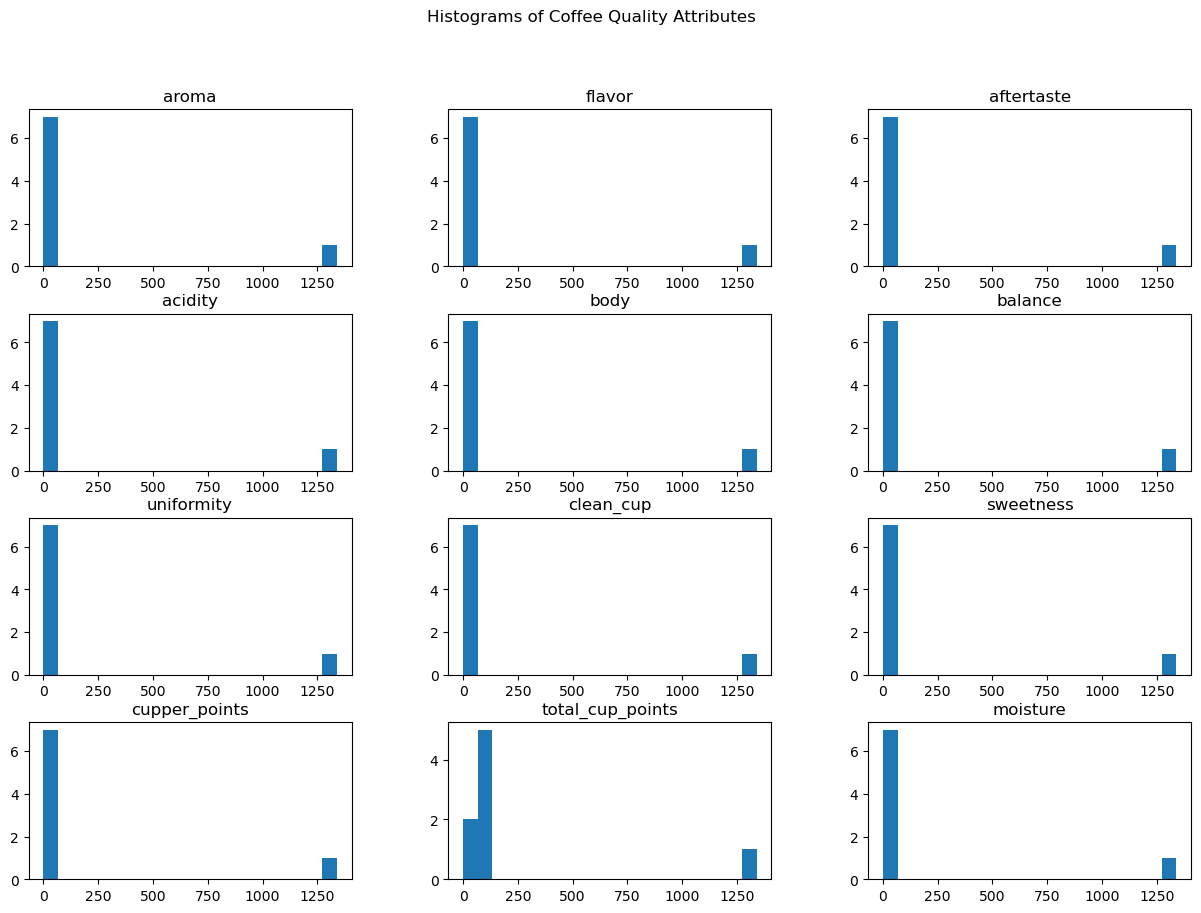

In [37]:
represent_subjective_ratings[columns_ratings].hist(bins=20, figsize=(15, 10), grid=False)

plt.suptitle('Histograms of Coffee Quality Attributes')
plt.show()

### histograms with Seaborn:

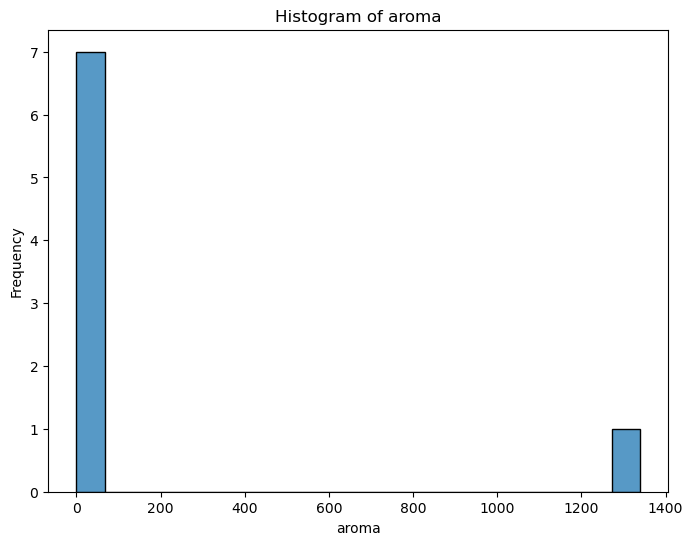

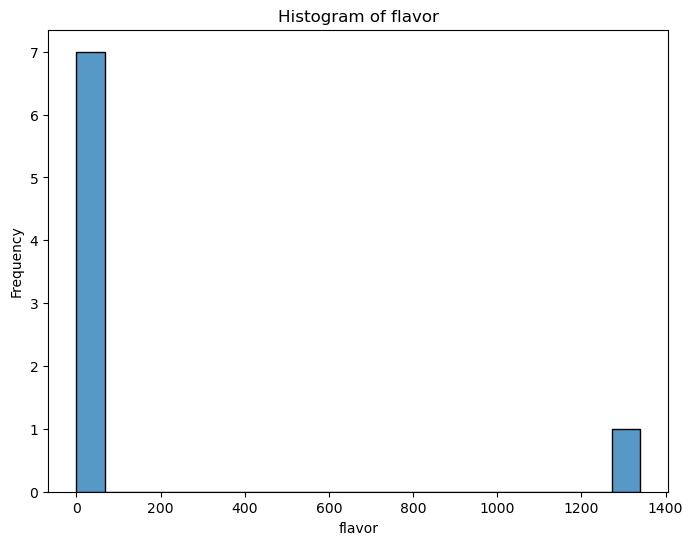

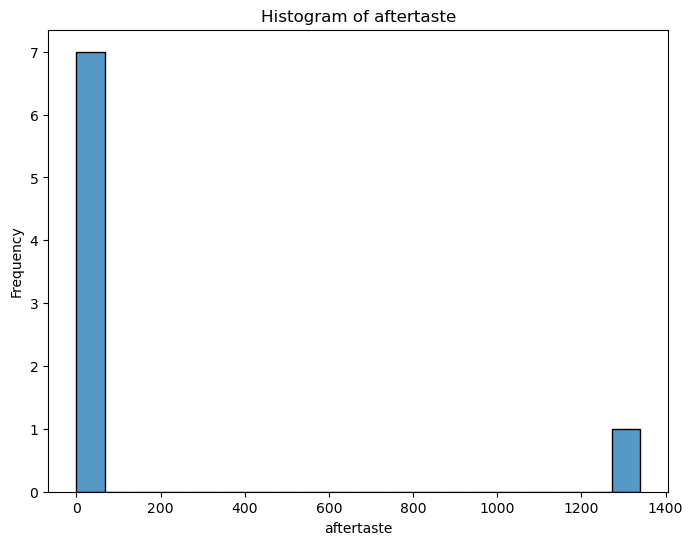

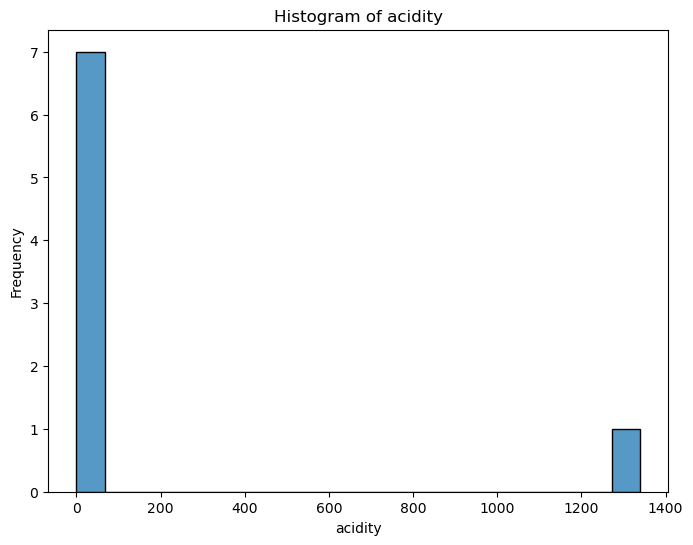

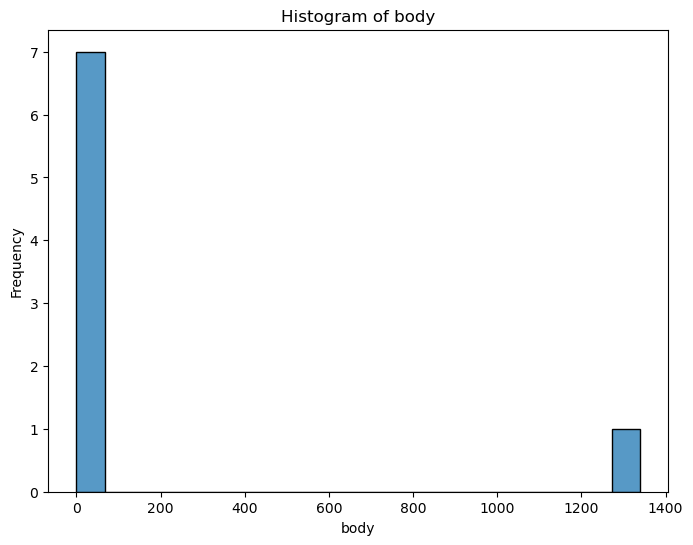

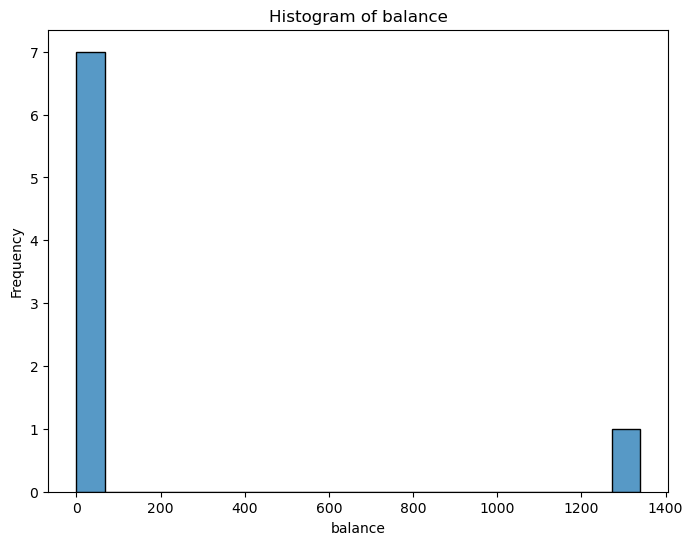

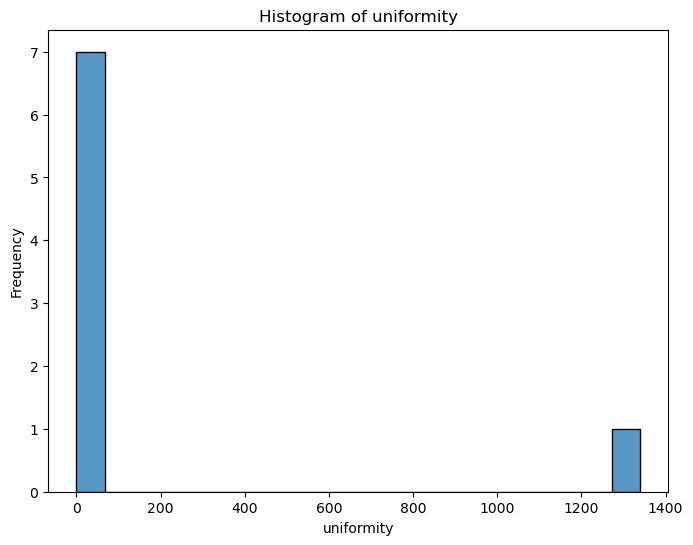

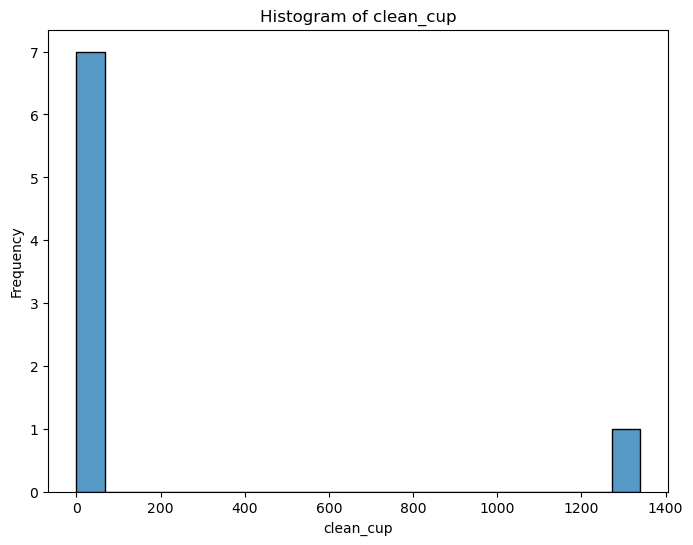

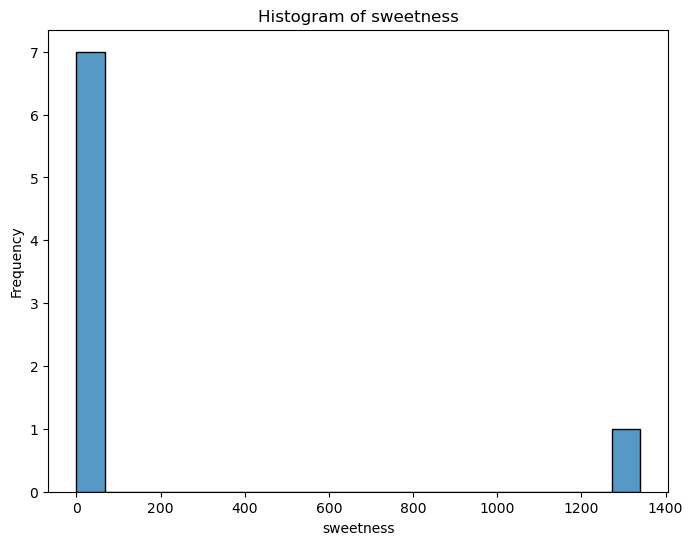

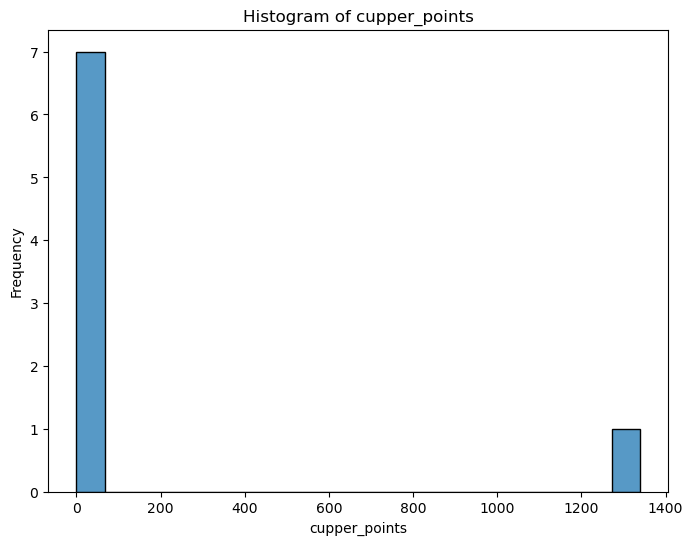

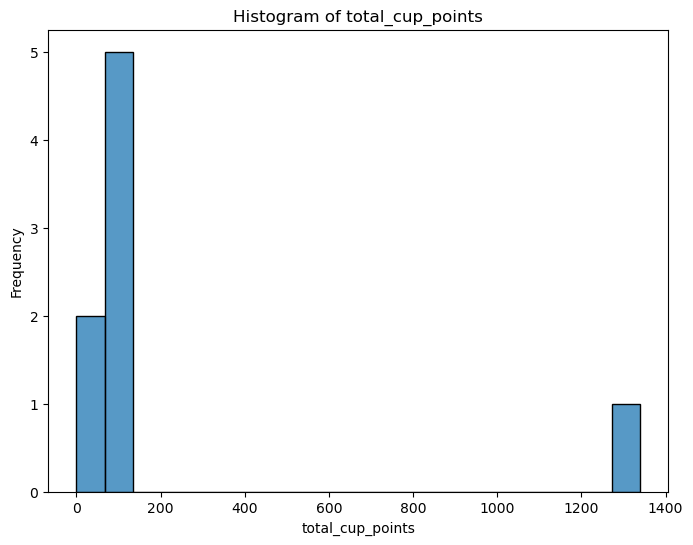

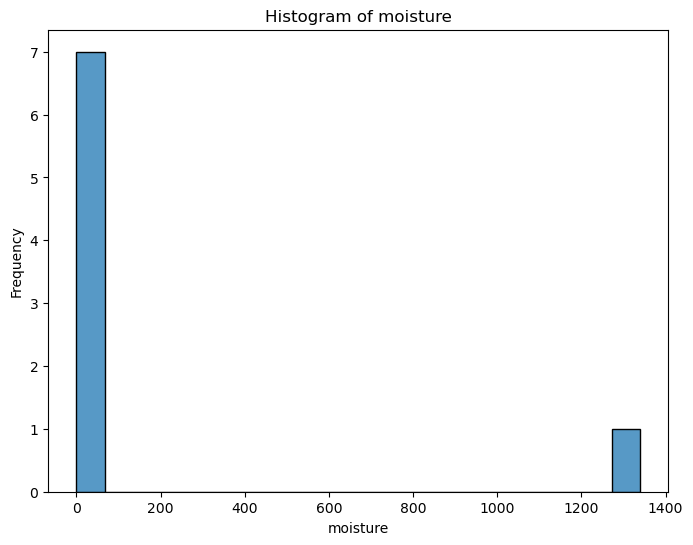

In [38]:
for column in represent_subjective_ratings.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(represent_subjective_ratings[column].dropna(), kde=False, bins=20)  # kde=False means not to plot the Kernel Density Estimation
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

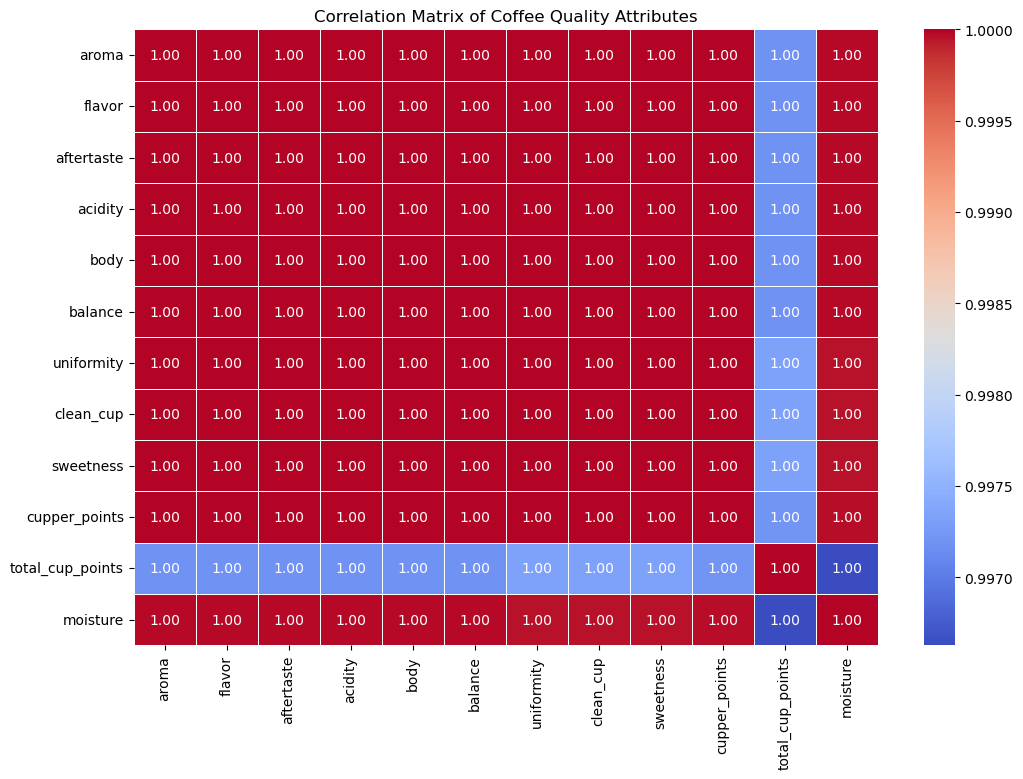

In [39]:
correlation_matrix = represent_subjective_ratings[columns_ratings].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Coffee Quality Attributes')
plt.show()

In [40]:
#represent_subjective_ratings

### Problem 10. High-level errors (1 point)
Check the countries against region names, altitudes, and companies. Are there any discrepancies (e.g. human errors, like a region not matching the country)? Take a look at the (cleaned) altitudes; there has been a lot of preprocessing done to them. Was it done correctly?

In [41]:
country_region =   coffee_set.groupby(['country_of_origin', 'region']).size() #.reset_index(name = "number")
country_region
#pivot_country_region = country_region.pivot(index = 'country_of_origin', columns = 'region', values = 'number') 
#pivot_country_region

country_of_origin  region                   
Brazil             alta paulista (sao paulo)     1
                   brazil matas de minas         1
                   campos altos - cerrado        4
                   carmo de minas                2
                   cerrado                      12
                                                ..
Vietnam            don duong                     2
                   vietnam                       1
                   vietnam cau dat               1
                   vietnam tutra                 1
Zambia             mubuyu estate                 1
Length: 362, dtype: int64

In [42]:
country_region =   coffee_set.groupby(['country_of_origin', 'altitude']).size() #.reset_index(name = "number")
country_region

country_of_origin            altitude  
Brazil                       1             11
                             1.2            2
                             1.25           1
                             1.250 m        2
                             1000 m         1
                                           ..
United States (Puerto Rico)  2800 ft        4
Vietnam                      1040           2
                             1040m          2
                             1550           3
Zambia                       1000-1500m     1
Length: 523, dtype: int64

### it is visible that in altitude are used different measures. 
### We will convert all im meters

In [56]:
def convert_to_meters(altitude):
    # Check for ranges (e.g., "1000-1500m")
    
    
    # Remove any spaces and check for "ft"
    altitude = altitude.replace(' ', '')
    if 'ft' in altitude:
        altitude_value = int(re.findall(r'\d+', altitude)[0])
        return altitude_value * 0.3048  # Convert feet to meters
    
    # Check for "m" (meters) and just extract the number
    if 'm' in altitude:
        altitude_value = int(re.findall(r'\d+', altitude)[0])
        return altitude_value

    if '-' in altitude:
        range_values = re.findall(r'\d+', altitude)
        if range_values:
            altitude = int(range_values[0]) + int(range_values[1])  / 2  # Average the range
        return float(altitude)
    
    # Assume no unit means meters
    try:
        return float(altitude)
    except ValueError:
        return None

# Apply the conversion function to the 'altitude' column
coffee_set['altitude_meters'] = coffee_set['altitude'].apply(convert_to_meters)

# Display the resulting DataFrame
country_region =   coffee_set.groupby(['country_of_origin', 'altitude']).size()
country_region

AttributeError: 'float' object has no attribute 'replace'

### * Problem 11. Clean and explore at will
The dataset claimed to be clean, but we were able to discover a lot of things to fix and do better.

Play around with the data as much as you wish, and if you find variables to tidy up and clean - by all means, do that!